# Ill-conditioned matrix

Determinant numerically unstable for ill-conditioned matrices. We try Kulkarni/Colbourn sampling with different levels of matrix conditioning and compare it to samples from Castaway (and Wilson) sampling.

In [1]:
import networkx as nx
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as scp

from treesampling.utils import graphs, math, visualization
from treesampling.algorithms import kirchoff_rst, wilson_rst, colbourn_rst
from treesampling.algorithms.castaway_legacy import _castaway_rst_log
from treesampling.algorithms.castaway_legacy import _castaway_rst_log as castaway_log_rst
from treesampling.utils.graphs import graph_weight, laplacian, mat_minor, reset_adj_matrix, tree_to_newick
from treesampling.utils.math import generate_random_matrix
from treesampling.utils.visualization import plot_logweights_heatmap


p=0.8
p=5e-30
p=1e-200
p=0.8
p=5e-30
p=1e-200


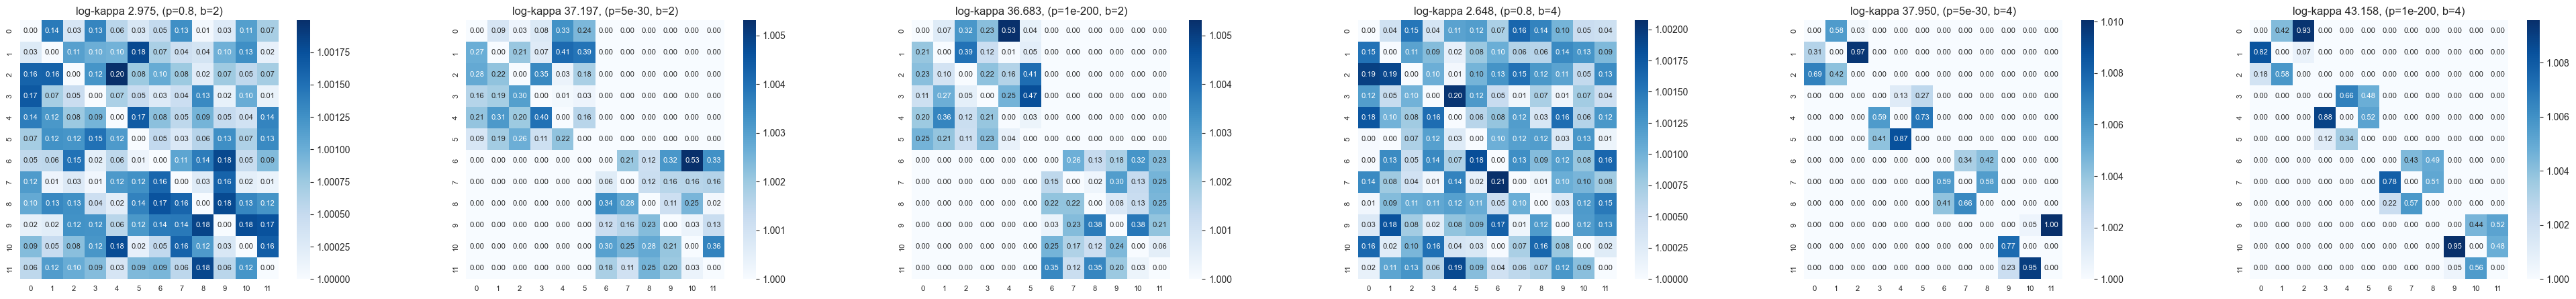

In [2]:
params = [(8e-1,2), (5e-30,2), (1e-200,2), (8e-1,4), (5e-30,4), (1e-200,4)]
n_nodes = 12
fig, axs = plt.subplots(1, len(params), figsize=(50, 5))
for i, (p, n_blocks) in enumerate(params):
    print(f"p={p}")
    graph = graphs.random_weakly_connected_k_subgraphs(n_nodes, k=n_blocks, log_probs=False, weak_weight=p)
    weights = nx.to_numpy_array(graph)
    L = np.diag(weights.sum(axis=0)) - weights
    L1r = mat_minor(L, 0, 0)
    # print("L:", L)
    #weights = generate_matrix_with_condition_number(n_nodes, cn)
    ax = visualization.plot_logweights_heatmap(weights, ax=axs[i])
    ax.set_title(f"log-kappa {np.log(la.cond(L1r)):.3f}, (p={p}, b={n_blocks})")


In [3]:
# pick one matrix
sample_size = 2000
p, n_blocks = (5e-30, 4)
graph = graphs.random_weakly_connected_k_subgraphs(n_nodes, k=n_blocks, log_probs=False, weak_weight=p)

<Axes: >

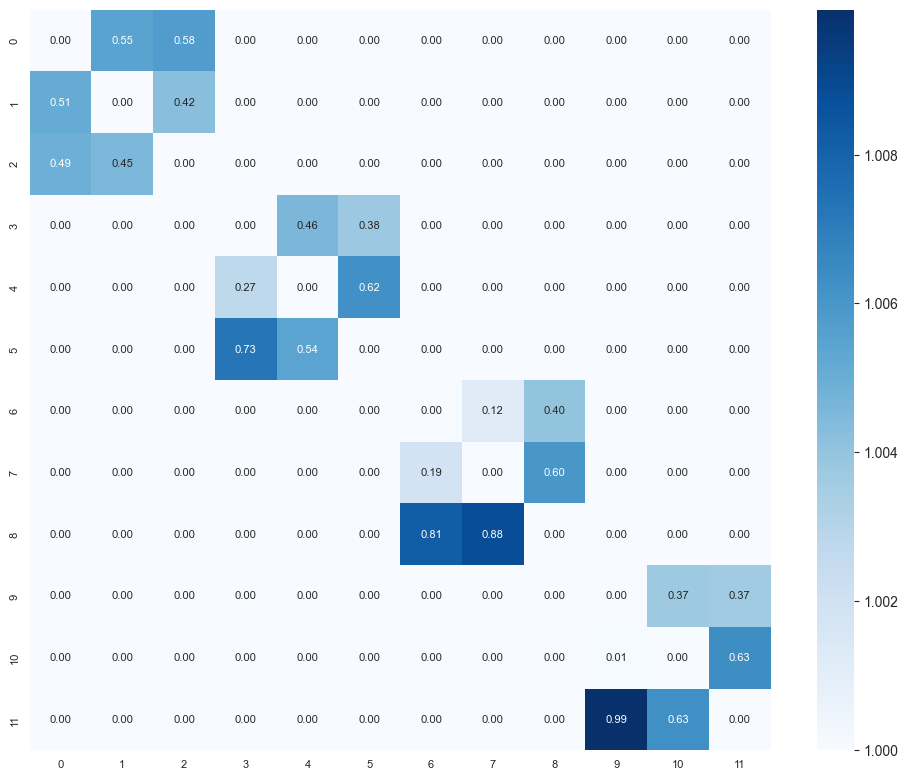

In [4]:
plot_logweights_heatmap(nx.to_numpy_array(graph))

In [5]:
log_graph = reset_adj_matrix(graph, np.log(nx.to_numpy_array(graph)))

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_92540/409378346.py:1: RuntimeWarning: divide by zero encountered in log
  log_graph = reset_adj_matrix(graph, np.log(nx.to_numpy_array(graph)))


<Axes: >

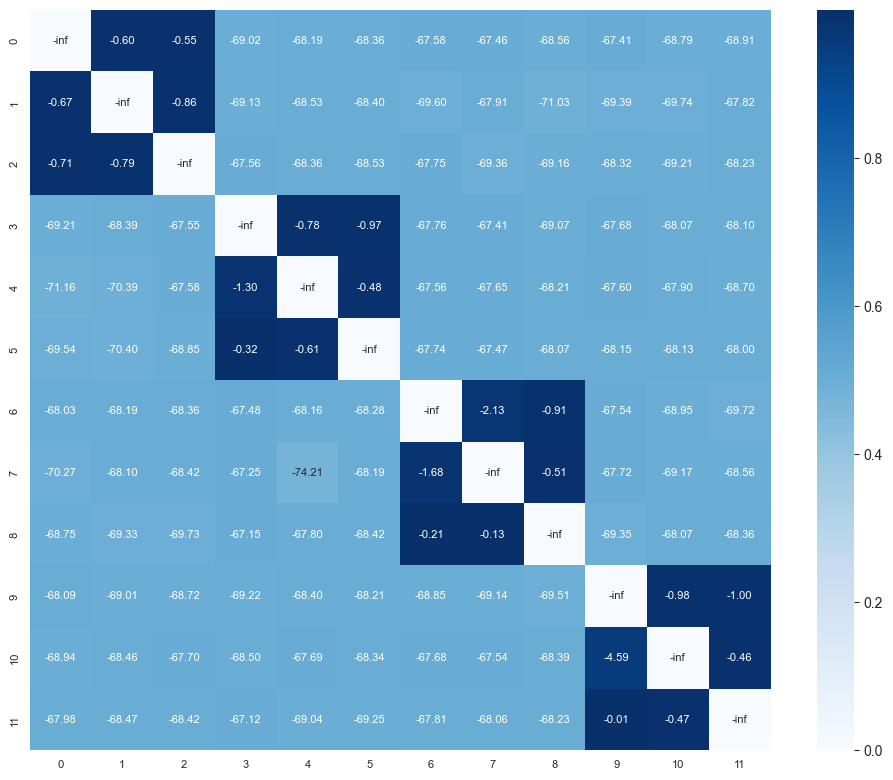

In [6]:
plot_logweights_heatmap(nx.to_numpy_array(log_graph))

In [40]:
tree_test = castaway_log_rst(log_graph, 0, trick=False)
tree_to_newick(tree_test)

/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:349: RuntimeWarning: divide by zero encountered in log
  ry = - np.log(1 - np.exp(ry_1))
/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:349: RuntimeWarning: invalid value encountered in log
  ry = - np.log(1 - np.exp(ry_1))


'(((((((((3)1)2)4)5)6)7)8,(11)10)9)0'

In [42]:
graph_0 = graph.remove_edges_from([(u, v) for u, v in graph.edges() if v == 0 or u == v])
msa = nx.maximum_spanning_arborescence(graph)
tree_to_newick(msa)

'((1)2,((3)4)5,((7)8)6,((9)11)10)0'

In [ ]:
graph_weight(tree_test), graph_weight(nx.maximum_spanning_arborescence(graph))

In [33]:
L = laplacian(nx.to_numpy_array(graph))
L1r = mat_minor(L, 0, 0)
la.cond(L1r)

3.212924058618061e+16

In [21]:
# sample trees
# Castaway
edge_freq_castaway = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = castaway_log_rst(log_graph, root=0, trick=False)
    for e in tree.edges():
        edge_freq_castaway[e] += 1


/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:349: RuntimeWarning: divide by zero encountered in log
  ry = - np.log(1 - np.exp(ry_1))
/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/castaway_legacy.py:349: RuntimeWarning: invalid value encountered in log
  ry = - np.log(1 - np.exp(ry_1))


In [13]:
# wilson
edge_freq_wilson = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = wilson_rst(graph)
    for e in tree.edges():
        edge_freq_wilson[e] += 1


KeyboardInterrupt: 

In [15]:
# kulkarni A8
edge_freq_kirch = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = kirchoff_rst(graph, root=0)
    for e in tree.edges():
        edge_freq_kirch[e] += 1


/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/__init__.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = aa / a


IndexError: pop from empty list

In [12]:

edge_freq_colbourn = np.zeros((n_nodes, n_nodes))
for i in range(sample_size):
    tree = colbourn_rst(graph, root=0)
    for e in tree.edges():
        edge_freq_colbourn[e] += 1


/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/__init__.py:169: RuntimeWarning: divide by zero encountered in divide
  marginals /= np.sum(marginals)
/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms/__init__.py:169: RuntimeWarning: invalid value encountered in divide
  marginals /= np.sum(marginals)


ValueError: probabilities contain NaN

Text(0.5, 1.0, 'Kirchoff')

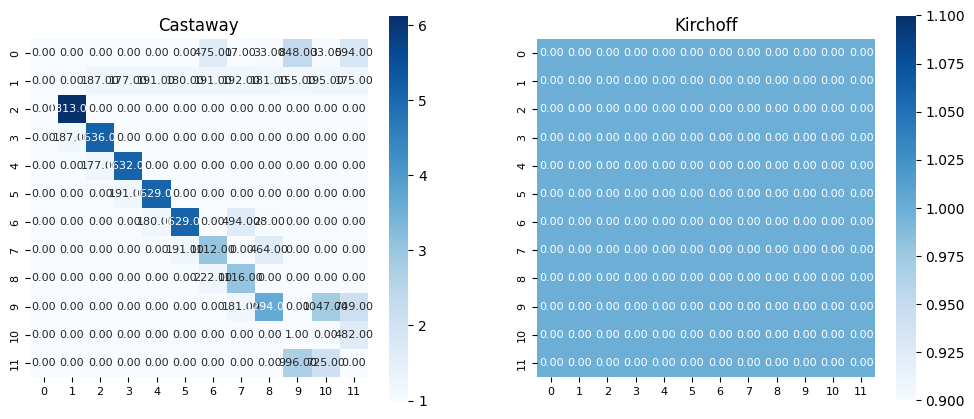

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
visualization.plot_logweights_heatmap(edge_freq_castaway, ax=axs[0], color_tempering=1000)
axs[0].set_title('Castaway')
visualization.plot_logweights_heatmap(edge_freq_kirch, ax=axs[1], color_tempering=1000)
axs[1].set_title('Kirchoff')


# Build weight matrix with 2 ill-conditioned blocks
If $A \in M^{N x N}$ is a matrix with condition number $\kappa$, then build a symmetric matrix $W \in M^{2N x 2N}$ with two blocks $A$ above and below diagonal, and zeros on the rest of the elements.
$$
\begin{pmatrix}
0 & A \\
A & 0
\end{pmatrix}
$$



[[ 1.09028188  0.32132297 -0.00509835 -0.06696057  0.03916124 -0.33127648
  -0.62403978 -0.14481171]
 [ 0.32132297  1.26604361 -0.23169914  0.13029503  0.03209368 -0.21800416
  -0.58664372 -0.36272002]
 [-0.00509835 -0.23169914  0.7199302  -0.01340257 -0.16664838 -0.21814422
  -0.1547815   0.3858816 ]
 [-0.06696057  0.13029503 -0.01340257  1.5270301  -0.02294127 -0.49930647
  -0.27346799 -0.46616415]
 [ 0.03916124  0.03209368 -0.16664838 -0.02294127  1.10550025 -0.07310362
  -0.47686285 -0.1801664 ]
 [-0.33127648 -0.21800416 -0.21814422 -0.49930647 -0.07310362  1.29977759
   0.76753996 -0.39420561]
 [-0.62403978 -0.58664372 -0.1547815  -0.27346799 -0.47686285  0.76753996
   1.81238495 -0.12908104]
 [-0.14481171 -0.36272002  0.3858816  -0.46616415 -0.1801664  -0.39420561
  -0.12908104  1.6483453 ]]


<Axes: >

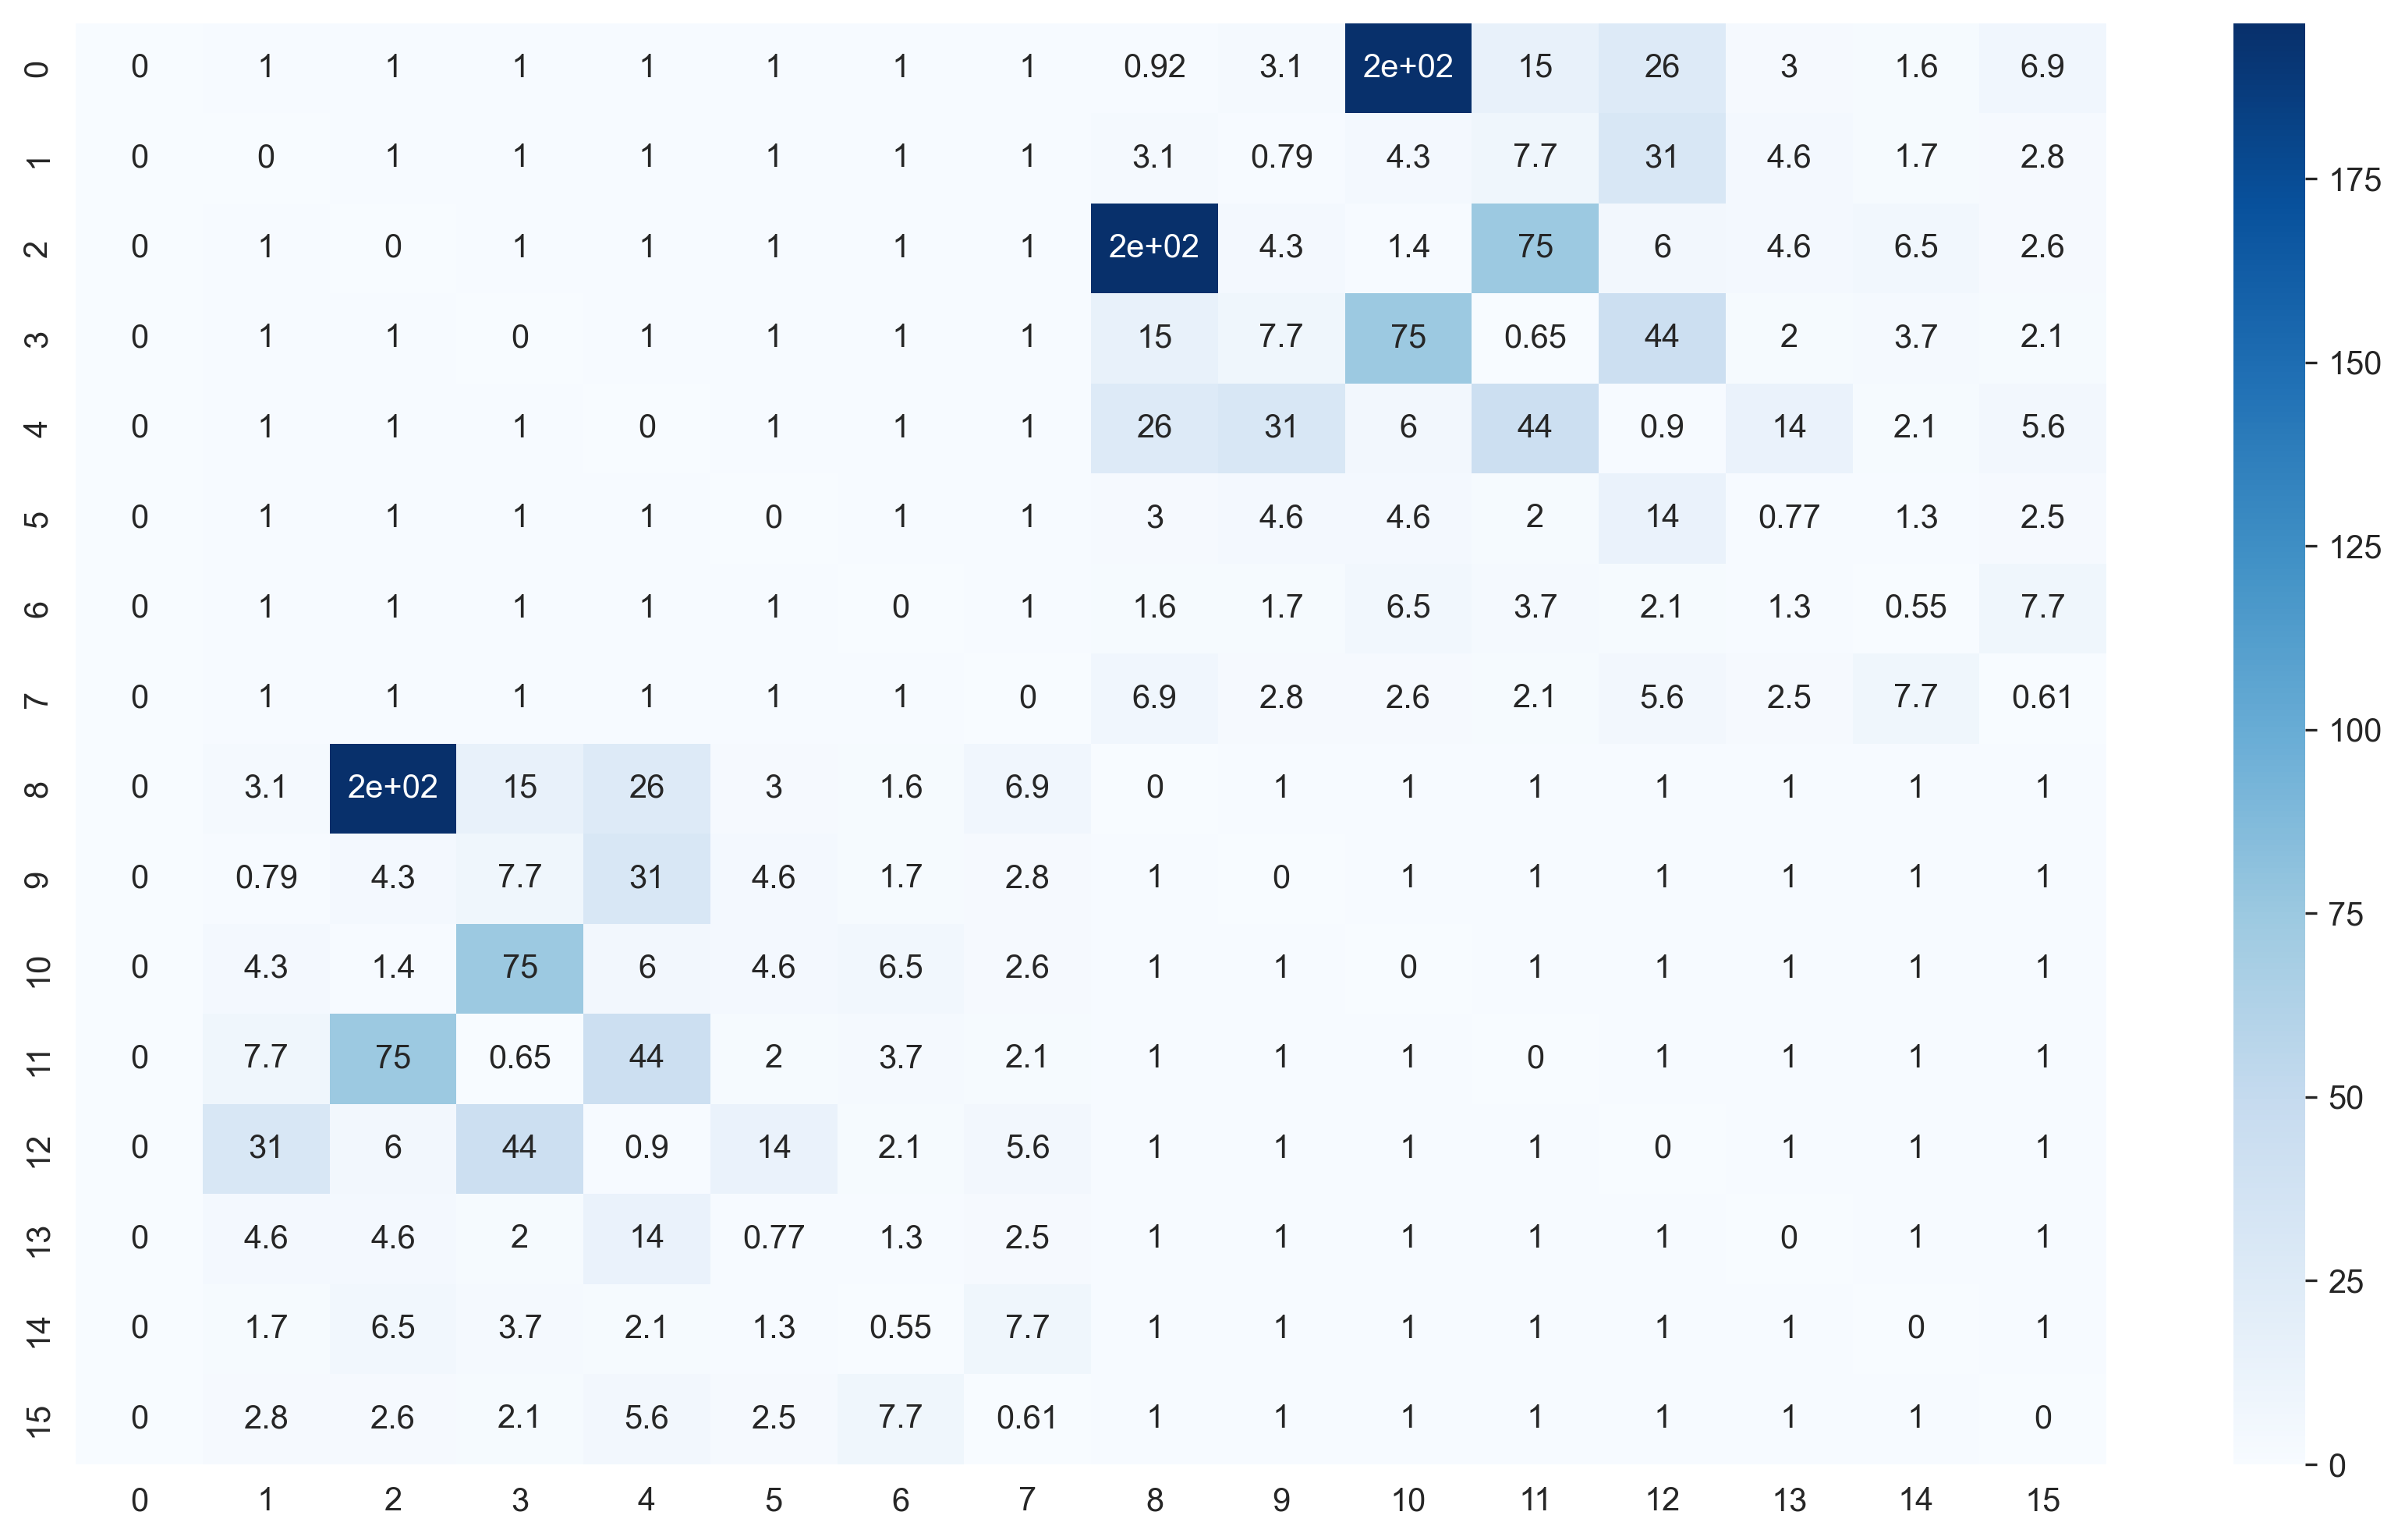

In [24]:
N = 8
A = generate_random_matrix(N, 10)
print(A)
W = np.ones((2*N, 2*N))
W[:N, N:] = np.abs(1/A)
W[N:, :N] = np.abs(1/A).transpose()
W[np.diag_indices(W.shape[0])] = 0
W[:, 0] = 0

fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=300)
sns.heatmap(W, ax=ax, annot=True, cmap='Blues')

In [25]:
from treesampling.utils.graphs import mat_minor, laplacian

norm_W = W / W.sum(axis=0, keepdims=True)
norm_W[:, 0] = 0
L = laplacian(norm_W)
L1r = mat_minor(L, 0, 0)
la.cond(L1r)

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_66549/3154296142.py:3: RuntimeWarning: invalid value encountered in divide
  norm_W = W / W.sum(axis=0, keepdims=True)


34.41401437875749

In [26]:
from treesampling.algorithms import _koo_laplacian
L = _koo_laplacian(W[1:, 1:], W[0, 1:])
la.cond(L)

35.20352814304967

Text(0.5, 1.0, 'Normalized W')

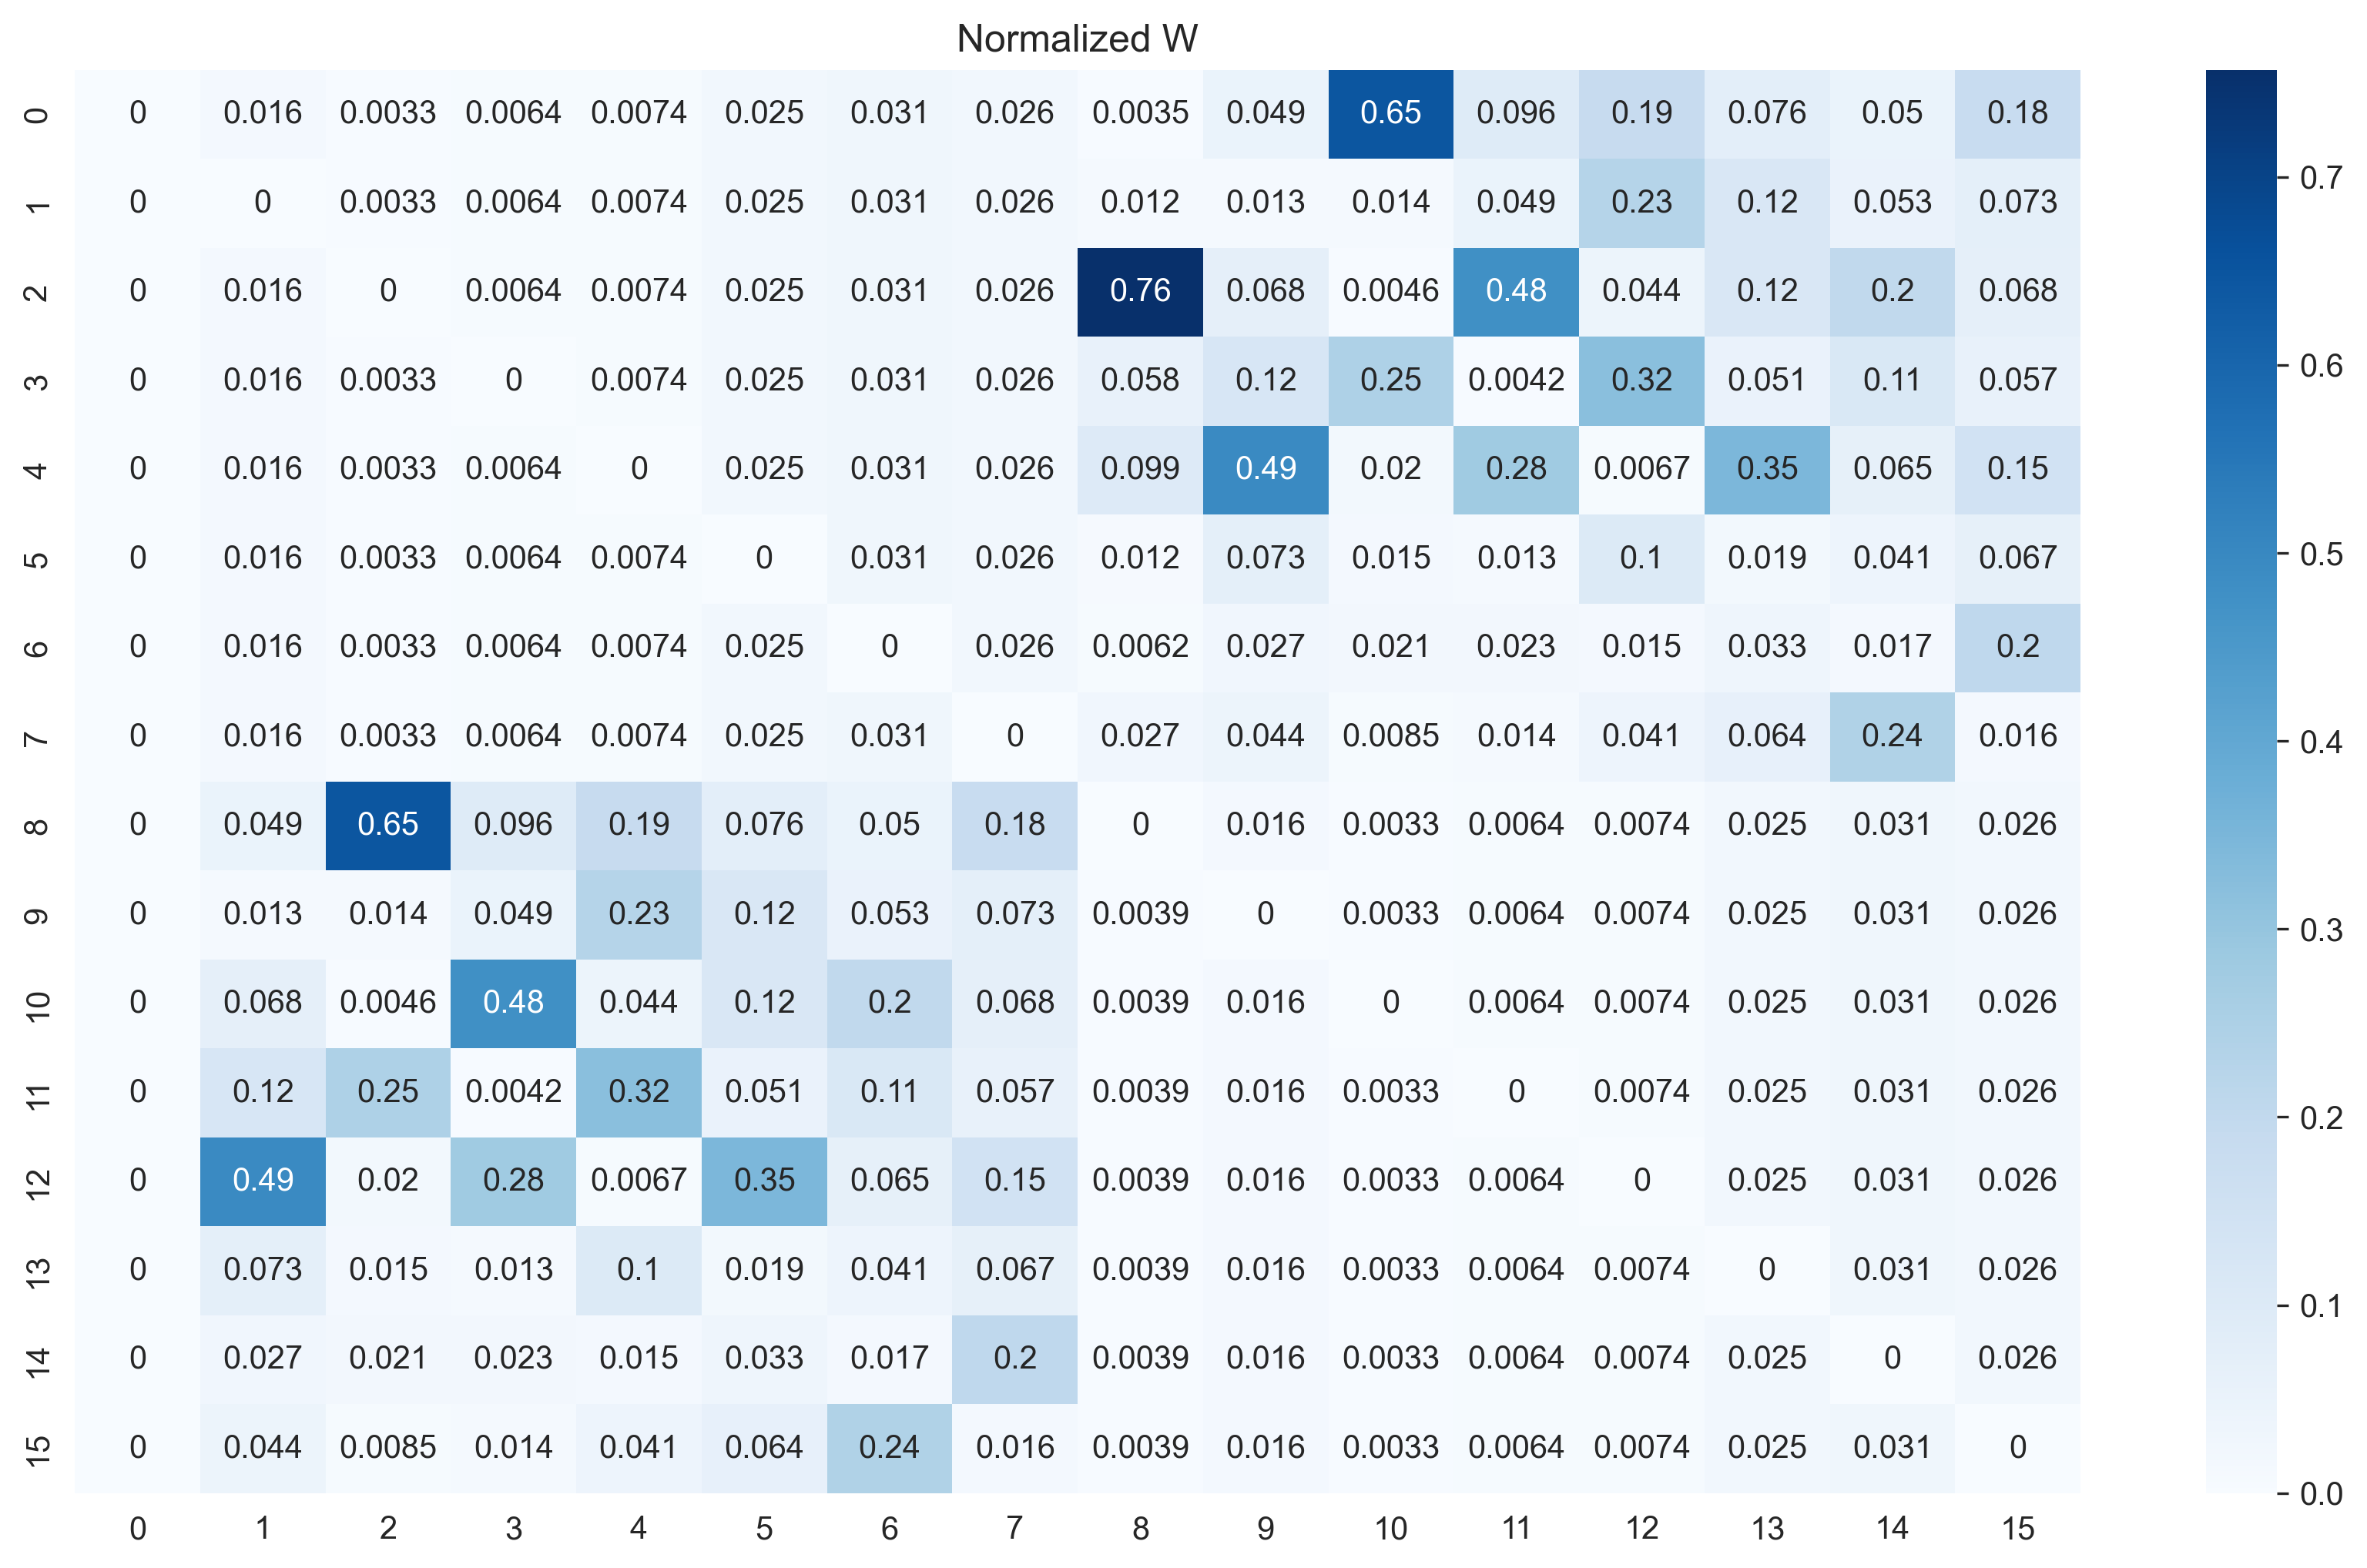

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=300)
sns.heatmap(norm_W, ax=ax, annot=True, cmap='Blues')
ax.set_title('Normalized W')

In [28]:
tree = _castaway_rst_log(np.log(W), root=0, trick=True)
tree_to_newick(tree), graph_weight(tree, log_probs=True)

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_66549/892984362.py:1: RuntimeWarning: divide by zero encountered in log
  tree = _castaway_rst_log(np.log(W), root=0, trick=True)


('((((2,(((5,7)12)1,(14)9,13)4,(6)15)8)3)10,11)0', -27.598263228632124)

In [30]:
graph = nx.from_numpy_array(W)
graph.remove_edges_from([(u, v) for u, v in graph.edges() if u == v and v == 0])
tree = kirchoff_rst(graph, root=0)
tree_to_newick(tree), np.log(graph_weight(tree))

IndexError: pop from empty list

In [31]:
#colbourn
graph = nx.from_numpy_array(W)
graph.remove_edges_from([(u, v) for u, v in graph.edges() if u == v and v == 0])
tree = colbourn_rst(graph, root=0)
tree_to_newick(tree), np.log(graph_weight(tree))

('(((4,((8,(2)11,14)7)6)9,(((10,(1)12)3)13)15)5)0', -36.64433497678702)

In [45]:
# check edge distribution for castaway
edge_counts_castaway = np.zeros((2*N, 2*N))
tree_counts_castaway = {}
tree_probs_castaway = {}
for i in range(2000):
    tree = _castaway_rst_log(np.log(W), root=0, trick=True)
    tnwk = tree_to_newick(tree)
    tree_counts_castaway[tnwk] = tree_counts_castaway.get(tnwk, 0) + 1
    if tnwk not in tree_probs_castaway:
        tree_probs_castaway[tnwk] = graph_weight(tree, log_probs=True)
    for e in tree.edges():
        edge_counts_castaway[e] += 1

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_66549/3640387390.py:6: RuntimeWarning: divide by zero encountered in log
  tree = _castaway_rst_log(np.log(W), root=0, trick=True)


In [52]:
# sort by tree probs
tot_weight = sum(tree_probs_castaway.values())
tree_probs_castaway = {k: v/tot_weight for k, v in tree_probs_castaway.items()}
sorted_trees_castaway = sorted(tree_probs_castaway.items(), key=lambda x: x[1], reverse=True)
tree_probs_castaway_list = [tree_probs_castaway[k] for k, _ in sorted_trees_castaway]
tree_counts_castaway_list = [tree_counts_castaway[k] for k, _ in sorted_trees_castaway]

In [57]:
len(sorted_trees_castaway)

2000

In [46]:
# check edge distribution for colbourn
edge_counts_colbourn = np.zeros((2*N, 2*N))
tree_counts_colbourn = {}
tree_probs_colbourn = {}
for i in range(2000):
    graph = nx.from_numpy_array(W)
    graph.remove_edges_from([(u, v) for u, v in graph.edges() if u == v and v == 0])
    tree = colbourn_rst(graph, root=0)
    tnwk = tree_to_newick(tree)
    tree_counts_colbourn[tnwk] = tree_counts_colbourn.get(tnwk, 0) + 1
    if tnwk not in tree_probs_colbourn:
        tree_probs_colbourn[tnwk] = graph_weight(tree, log_probs=True)
    for e in tree.edges():
        edge_counts_colbourn[e] += 1


In [53]:
# sort
tot_weight = sum(tree_probs_colbourn.values())
tree_probs_colbourn = {k: v/tot_weight for k, v in tree_probs_colbourn.items()}
sorted_trees_colbourn = sorted(tree_probs_colbourn.items(), key=lambda x: x[1], reverse=True)
tree_probs_colbourn_list = [tree_probs_colbourn[k] for k, _ in sorted_trees_colbourn]
tree_counts_colbourn_list = [tree_counts_colbourn[k] for k, _ in sorted_trees_colbourn]

In [47]:
# wilson
edge_counts_wilson = np.zeros((2*N, 2*N))
tree_counts_wilson = {}
tree_probs_wilson = {}
for i in range(2000):
    tree = wilson_rst_from_matrix(norm_W, root=0, log_probs=False)
    tnwk = tree_to_newick(tree)
    tree_counts_wilson[tnwk] = tree_counts_wilson.get(tnwk, 0) + 1
    if tnwk not in tree_probs_wilson:
        tree_probs_wilson[tnwk] = graph_weight(tree, log_probs=False)
    for e in tree.edges():
        edge_counts_wilson[e] += 1

In [54]:
# sort
tot_weight = sum(tree_probs_wilson.values())
tree_probs_wilson = {k: v/tot_weight for k, v in tree_probs_wilson.items()}
sorted_trees_wilson = sorted(tree_probs_wilson.items(), key=lambda x: x[1], reverse=True)
tree_probs_wilson_list = [tree_probs_wilson[k] for k, _ in sorted_trees_wilson]
tree_counts_wilson_list = [tree_counts_wilson[k] for k, _ in sorted_trees_wilson]


## COLBOURN doesn't work?
It seems from these plots that colbourn algorithm is slightly off set
Castaway and Wilson are consistent with the distribution of the edges

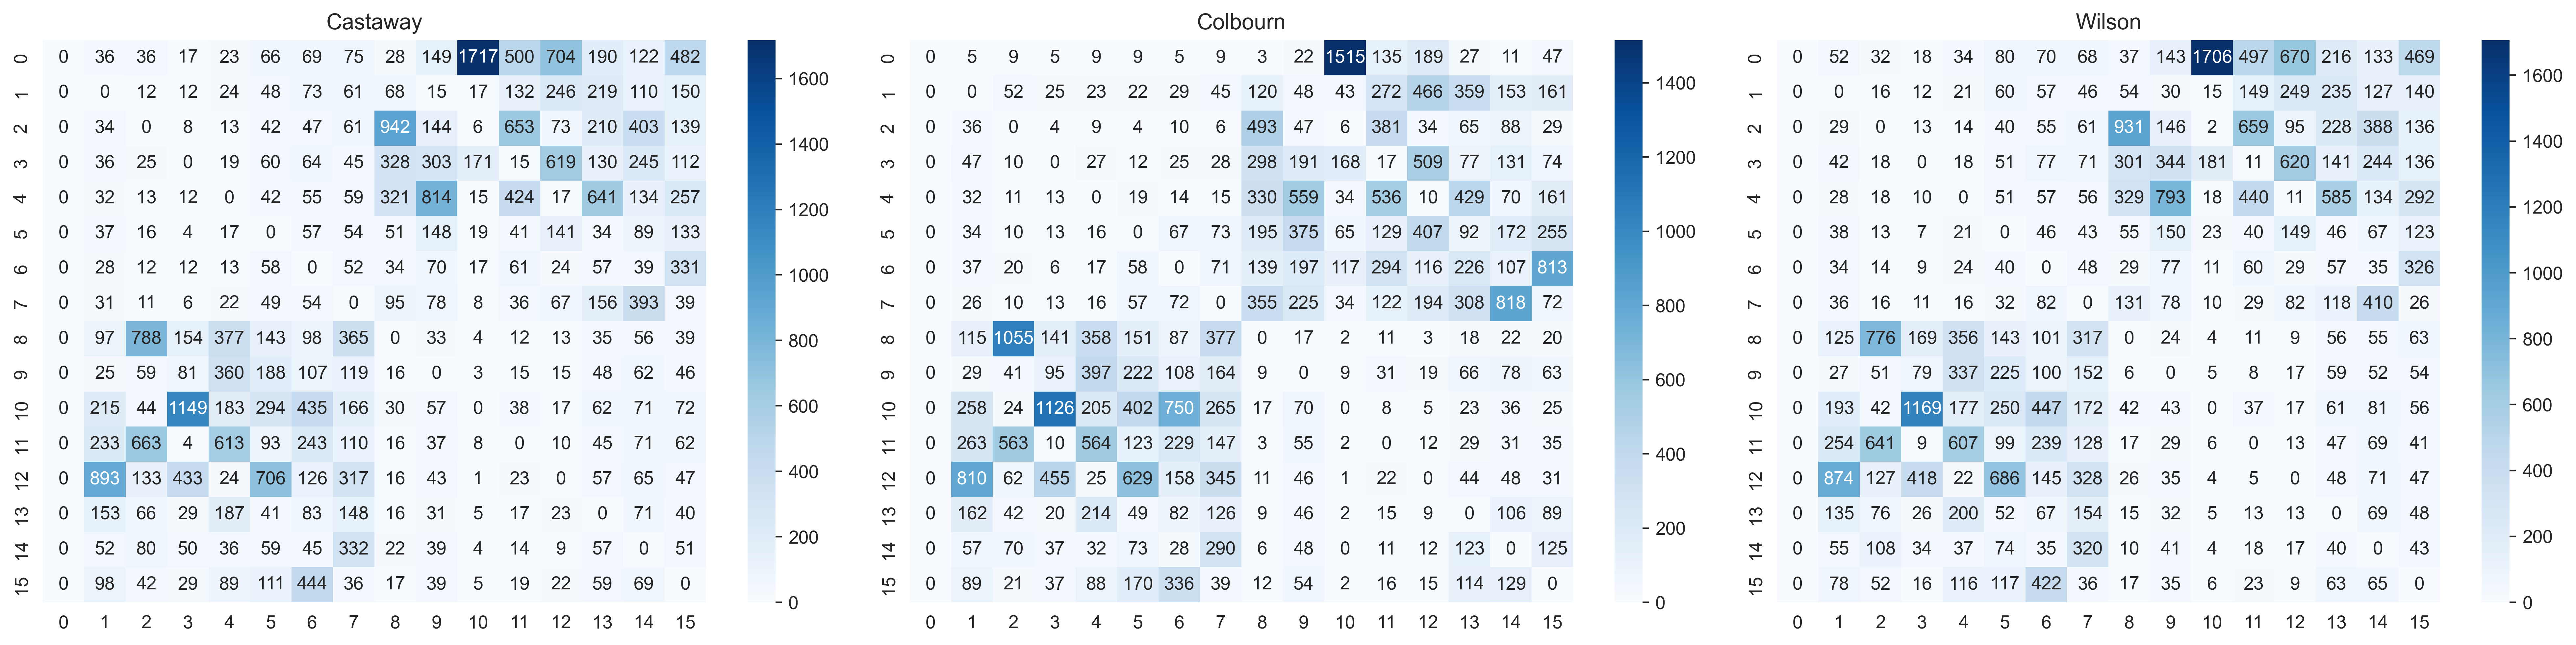

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=400)
sns.heatmap(edge_counts_castaway, ax=axs[0], annot=True, cmap='Blues', fmt='.0f')
sns.heatmap(edge_counts_colbourn, ax=axs[1], annot=True, cmap='Blues', fmt='.0f')
sns.heatmap(edge_counts_wilson, ax=axs[2], annot=True, cmap='Blues', fmt='.0f')
axs[0].set_title('Castaway')
axs[1].set_title('Colbourn')
axs[2].set_title('Wilson')
fig.tight_layout()

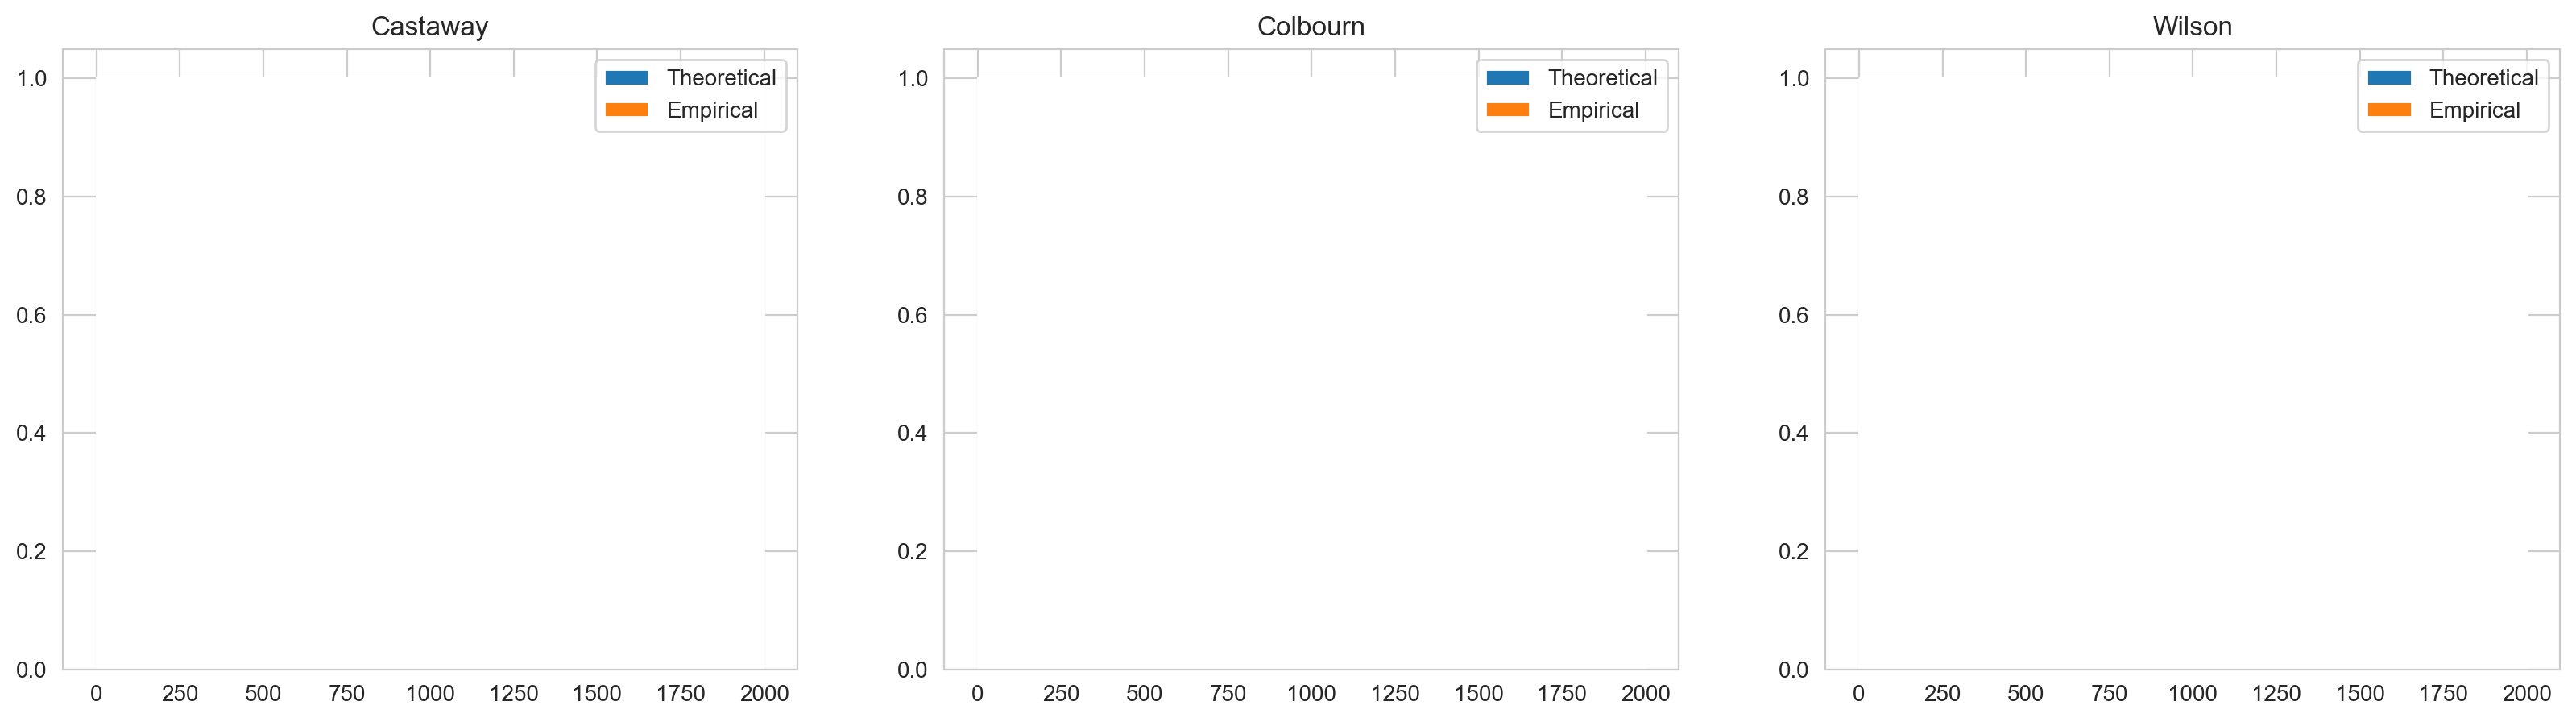

In [56]:

# plot bars with empirical and theoretical tree probs
fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=200)
axs[0].bar(range(len(tree_probs_castaway_list)), tree_probs_castaway_list, label='Theoretical')
axs[0].bar(range(len(tree_counts_castaway_list)), tree_counts_castaway_list, label='Empirical')
axs[0].set_title('Castaway')
axs[0].legend()
axs[1].bar(range(len(tree_probs_colbourn_list)), tree_probs_colbourn_list, label='Theoretical')
axs[1].bar(range(len(tree_counts_colbourn_list)), tree_counts_colbourn_list, label='Empirical')
axs[1].set_title('Colbourn')
axs[1].legend()
axs[2].bar(range(len(tree_probs_wilson_list)), tree_probs_wilson_list, label='Theoretical')
axs[2].bar(range(len(tree_counts_wilson_list)), tree_counts_wilson_list, label='Empirical')
axs[2].set_title('Wilson')
axs[2].legend()





In [16]:
tree = wilson_rst_from_matrix(np.log(W), root=0, log_probs=True)
tree_to_newick(tree), graph_weight(tree, log_probs=True)

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_66549/1518442115.py:1: RuntimeWarning: divide by zero encountered in log
  tree = wilson_rst_from_matrix(np.log(W), root=0, log_probs=True)


('(((((1,12,(13)15)3)4,((5)2)6)7,8,(10,14)9)11)0', -0.1029516926870222)

## DEBUG COLBOURN

In [96]:
from treesampling.utils.graphs import random_tree_skewed_graph

# check one tree skewed matrix
k = 6
skewed_graph, tree_ref = random_tree_skewed_graph(k, 50, root=0, log_probs=False)
weight_matrix = nx.to_numpy_array(skewed_graph)


In [97]:
# check edge distribution for colbourn
edge_counts_colbourn = np.zeros((k, k))
tree_counts_colbourn = {}
tree_probs_colbourn = {}
sample_N = 5000
for i in range(sample_N):
    graph = skewed_graph.copy()
    graph.remove_edges_from([(u, v) for u, v in graph.edges() if u == v and v == 0])
    tree = colbourn_rst(graph, root=0)
    tnwk = tree_to_newick(tree)
    tree_counts_colbourn[tnwk] = tree_counts_colbourn.get(tnwk, 0) + 1
    if tnwk not in tree_probs_colbourn:
        tree_probs_colbourn[tnwk] = graph_weight(tree, log_probs=False)
    for e in tree.edges():
        edge_counts_colbourn[e] += 1

# sort
tot_weight = sum(tree_probs_colbourn.values())
tree_probs_colbourn = {k: v / tot_weight for k, v in tree_probs_colbourn.items()}
sorted_trees_colbourn = sorted(tree_counts_colbourn.items(), key=lambda x: x[1], reverse=True)
tree_probs_colbourn_list = [tree_probs_colbourn[k] for k, _ in sorted_trees_colbourn]
tree_counts_colbourn_list = [tree_counts_colbourn[k] / sample_N for k, _ in sorted_trees_colbourn]


In [98]:
len(tree_counts_colbourn), sum(tree_probs_colbourn.values())

(79, 0.9999999999999937)

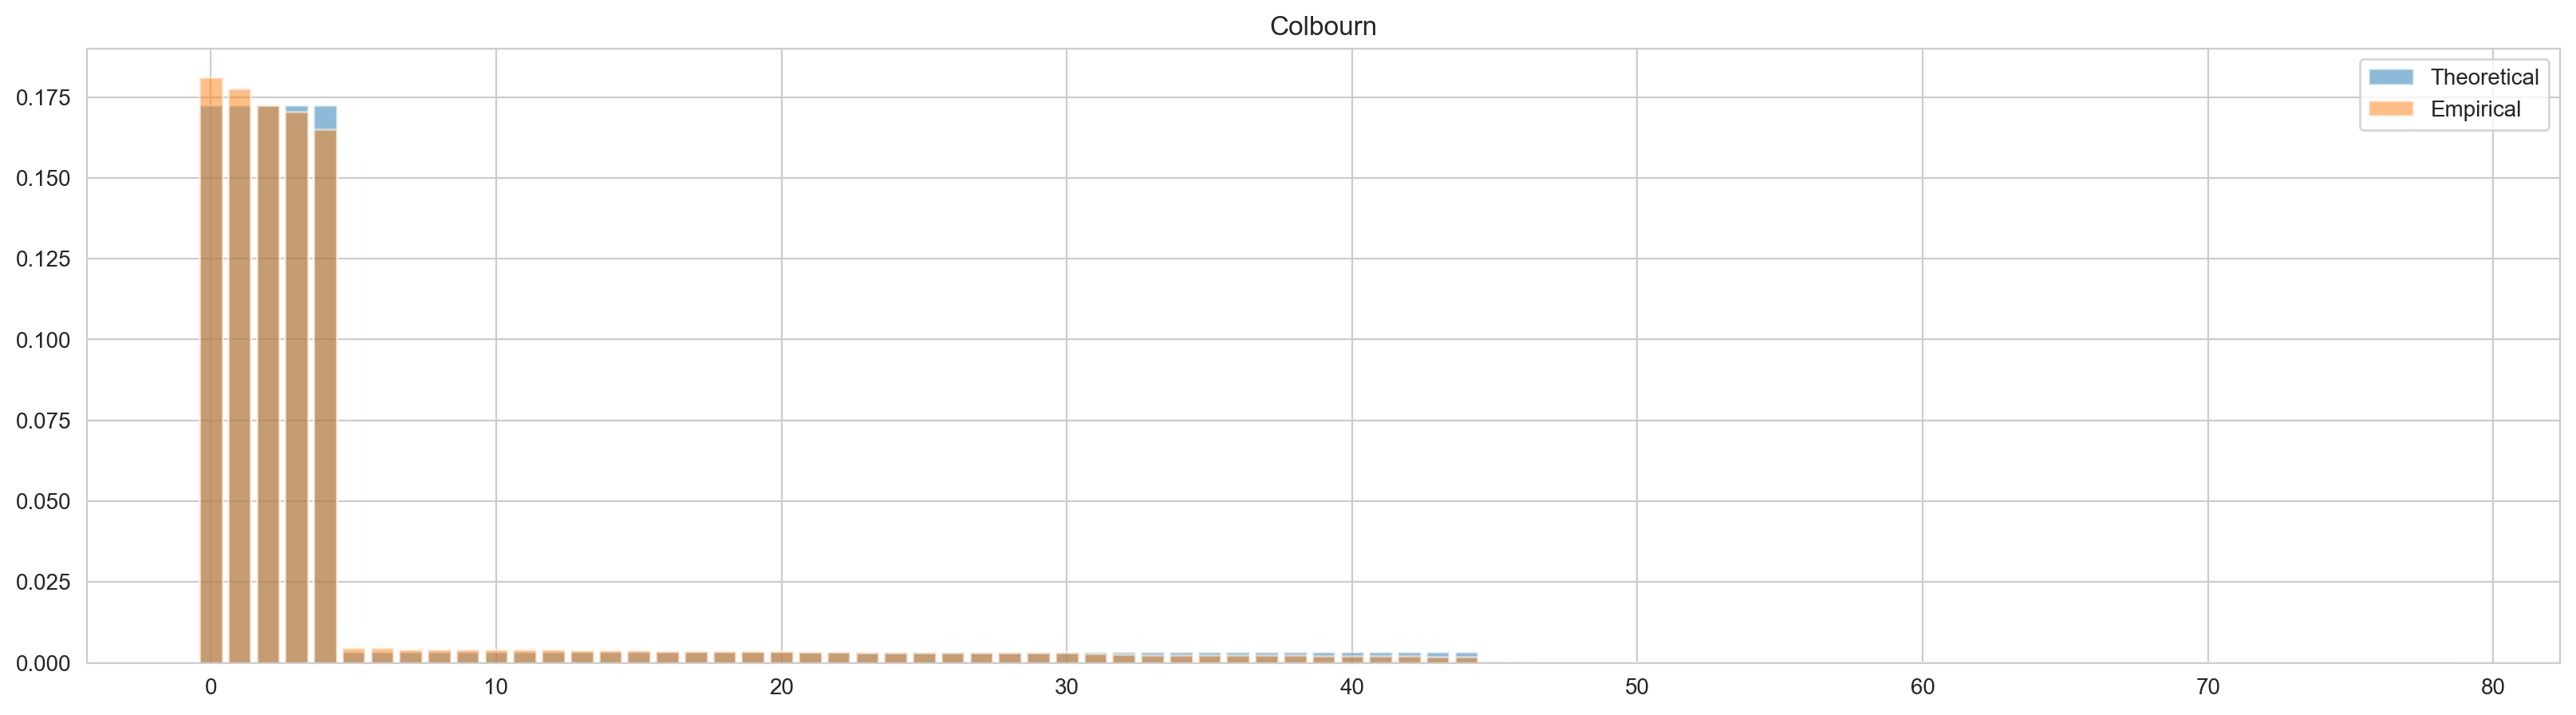

In [99]:
# plot bars with empirical and theoretical tree probs
fig, axs = plt.subplots(1, 1, figsize=(20, 5), dpi=200)
axs.bar(range(len(tree_probs_colbourn)), tree_probs_colbourn_list, label='Theoretical', alpha=0.5)
axs.bar(range(len(tree_probs_colbourn)), tree_counts_colbourn_list, label='Empirical', alpha=0.5)
axs.set_title('Colbourn')
axs.legend()

In [114]:
# castaway
edge_counts_castaway = np.zeros((k, k))
tree_counts_castaway = {}
tree_probs_castaway = {}
sample_N = 5000
for i in range(sample_N):
    graph = skewed_graph.copy()
    tree = castaway_log_rst(np.log(nx.to_numpy_array(graph)), root=0, trick=False)
    tnwk = tree_to_newick(tree)
    tree_counts_castaway[tnwk] = tree_counts_castaway.get(tnwk, 0) + 1
    if tnwk not in tree_probs_castaway:
        tree_probs_castaway[tnwk] = graph_weight(tree, log_probs=True)
    for e in tree.edges():
        edge_counts_castaway[e] += 1

# sort
tot_weight = sum([np.exp(v) for v in tree_probs_castaway.values()])
tree_probs_castaway = {k: np.exp(v) / tot_weight for k, v in tree_probs_castaway.items()}
sorted_trees_castaway = sorted(tree_counts_castaway.items(), key=lambda x: x[1], reverse=True)
tree_probs_castaway_list = [tree_probs_castaway[k] for k, _ in sorted_trees_castaway]
tree_counts_castaway_list = [tree_counts_castaway[k] / sample_N for k, _ in sorted_trees_castaway]

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_66549/143512100.py:8: RuntimeWarning: divide by zero encountered in log
  tree = castaway_log_rst(np.log(nx.to_numpy_array(graph)), root=0, trick=False)


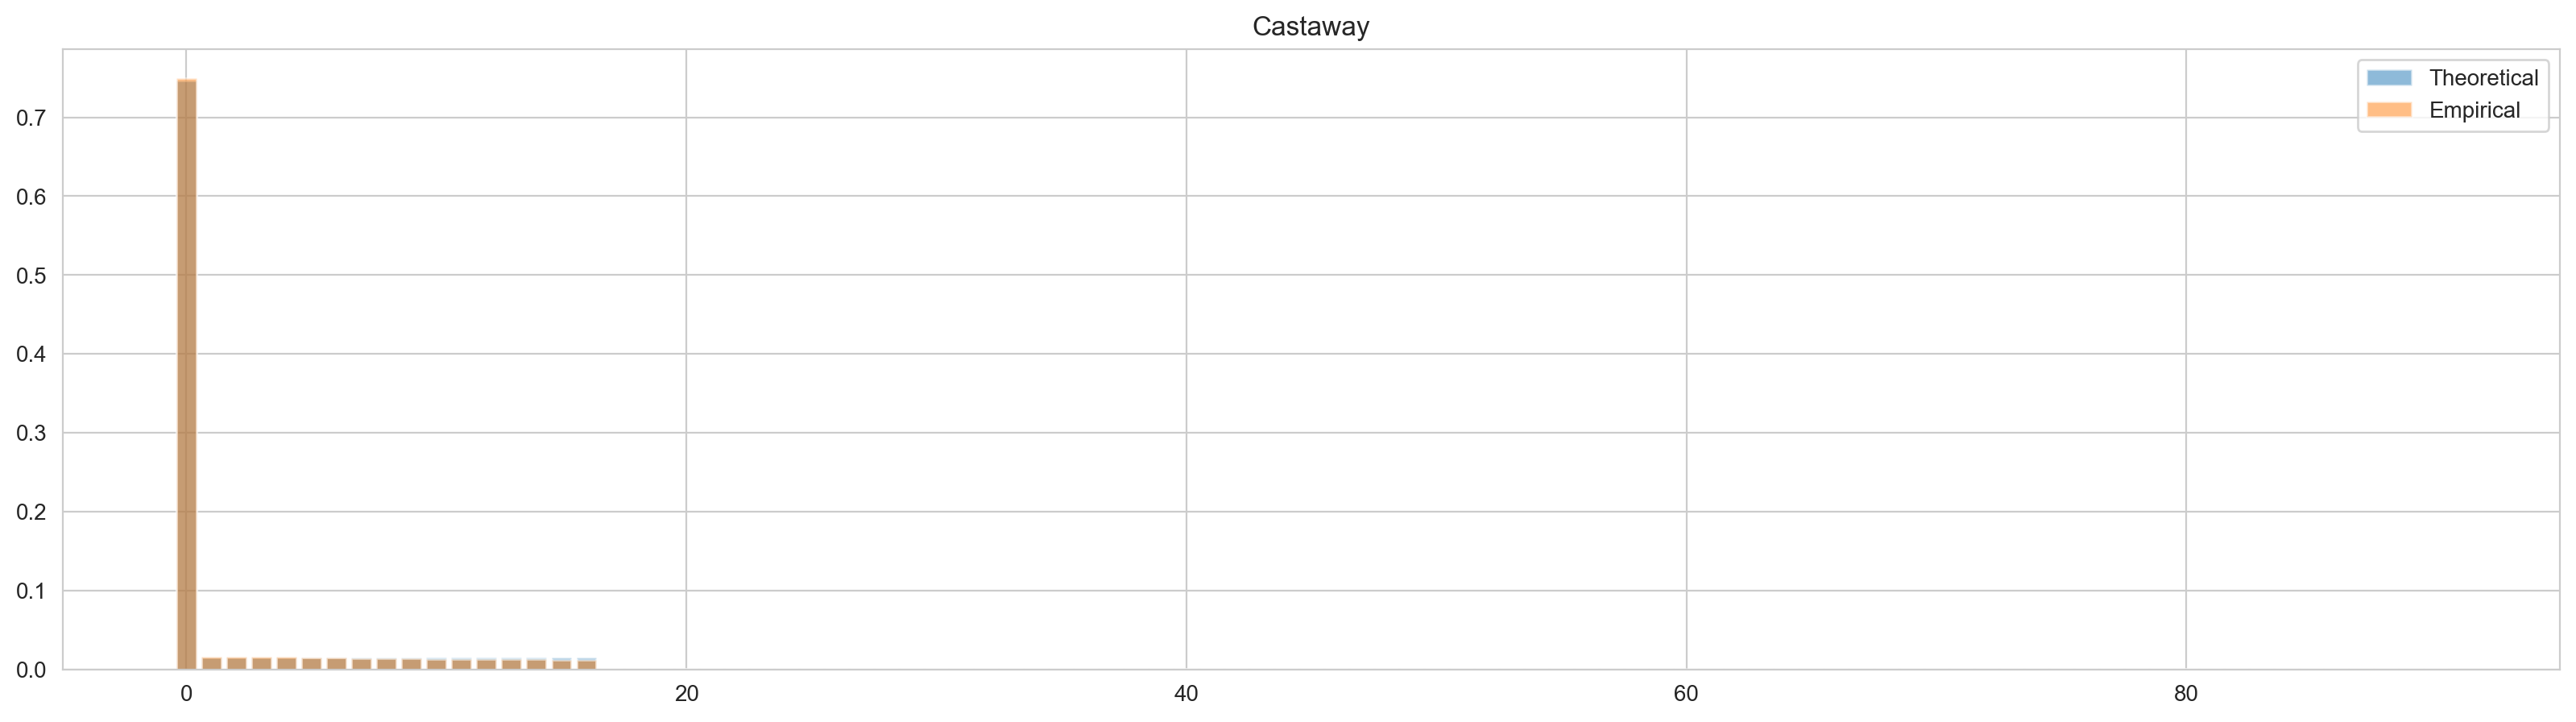

In [116]:
# plot bars with empirical and theoretical tree probs
fig, axs = plt.subplots(1, 1, figsize=(20, 5), dpi=200)
axs.bar(range(len(tree_probs_castaway_list)), tree_probs_castaway_list, label='Theoretical', alpha=0.5)
axs.bar(range(len(tree_counts_castaway_list)), tree_counts_castaway_list, label='Empirical', alpha=0.5)
axs.set_title('Castaway')
axs.legend()
